# EP17B009 Srijan Gupta
# EE4140: Digital Communication Systems
# Assignment 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as sciLA
from scipy import signal as sci_sig

**SNR**
$$
\text{SNR} = \frac{\text{signal power}}{\text{noise power}}
$$
For us, signal power $ = E[|I(k)|^2] = \sigma_I^2 = 1$,
and the power of the noise component along the signal $ = \sigma_v^2$
Hence,
$$
\text{SNR} = \frac{1}{\sigma_v^2}
$$

## (a) Viterbi Algorithm based sequence estimator

The implementation has been explained to the best of my efforts in the comments in the code for part (a) in Annexure-1

### Results (a1) to (a5):

#### SER:

| delta\SNR(dB) 	| 0       	| 2       	| 4       	| 6       	| 8       	| 10      	| 12      	| 14      	| 16      	|
|---------------	|---------	|---------	|---------	|---------	|---------	|---------	|---------	|---------	|---------	|
| **3**             	| 0.57981 	| 0.55308 	| 0.52235 	| 0.49035 	| 0.45302 	| 0.40535 	| 0.33856 	| 0.25214 	| 0.13113 	|
| **6**             	| 0.57911 	| 0.55398 	| 0.5237  	| 0.48969 	| 0.45041 	| 0.40217 	| 0.33427 	| 0.24382 	| 0.11776 	|
| **15**            	| 0.57936 	| 0.55429 	| 0.5235  	| 0.48953 	| 0.45075 	| 0.40074 	| 0.33231 	| 0.23993 	| 0.11064 	|
| **30**            	| 0.57938 	| 0.55418 	| 0.52346 	| 0.4896  	| 0.45062 	| 0.40078 	| 0.33274 	| 0.23919 	| 0.11031 	|

#### Figure 1
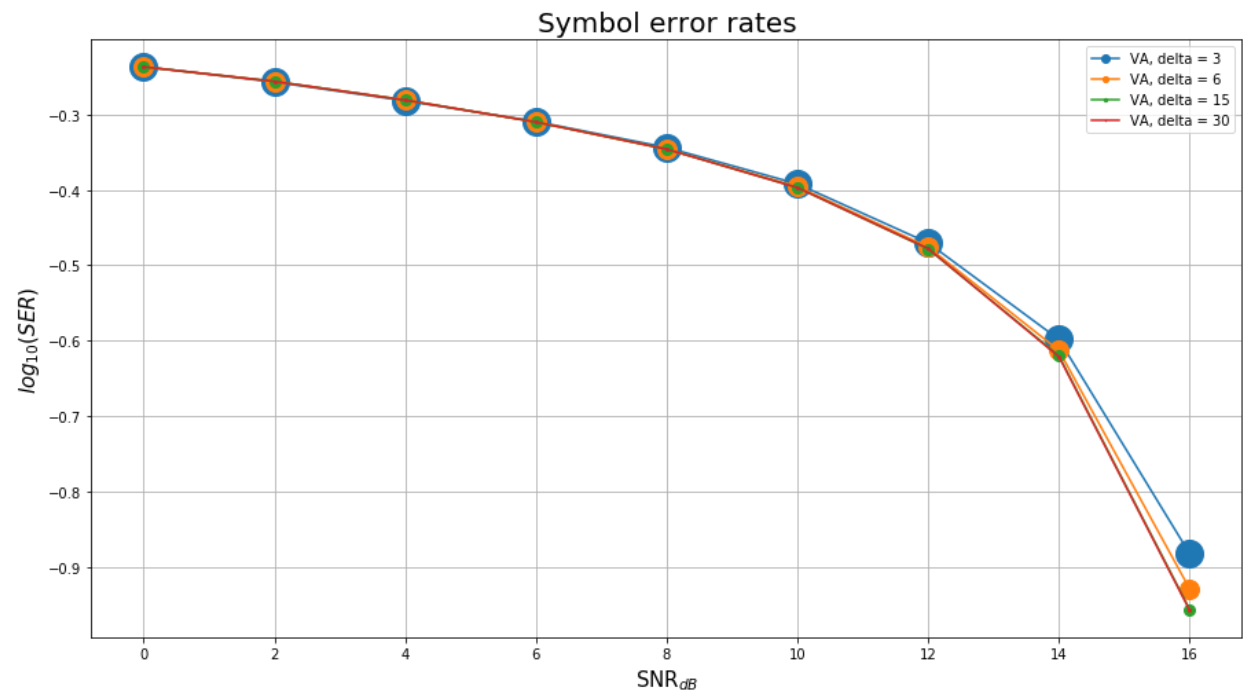

#### Observation
- The SER is only slightly lower for higher $\delta$'s
- SER is exact same for $\delta = 15$ and above, as can be seen in Fig 1



## (b) Linear equalizer

For a Linear Equaliser with 'N' taps, the symbols after equalization are,
$$
\hat{I}(k) = \mathbf{r}(k)_{_{N\times1}}^T\mathbf{W}_{\text{opt}_{N\times1}}
$$
where
$$
\mathbf{r}(k) = 
\begin{bmatrix}
r(k) & r(k-1) & \cdots & r(k-N)
\end{bmatrix}^T
$$
and
$$
\mathbf{W}_{\text{opt}} = \mathbf{R}^{-1}\mathbf{p}
$$
where 
$$
\mathbf{R} \equiv E(\mathbf{r}\mathbf{r}^T)
$$
which is a toeplitz matrix, and for the channel $f(k) = \{f_0, f_1, f_2\}$ and for our signal and noise power, it's first column is given by,
$$
\mathbf{R}[:,0] = 
\begin{bmatrix}
||f(k)||^2+\sigma_v^2 \\
(f_0f_1+f_1f_2) \\
f_0f_2 \\
0 \\
\vdots \\
0\\
\end{bmatrix}
$$
and
$$
\mathbf{p} \equiv E(\mathbf{r}I(k-\Delta))
$$
which for our case is
$$
\mathbf{p} = 
\begin{bmatrix}
p_0 = 0\\
\vdots\\
0\\
p_{\Delta-2} = f_2\\
p_{\Delta-1} = f_1\\
p_{\Delta} = f_0\\
0\\
\vdots\\
0
\end{bmatrix}
$$

### Results
#### (b1) N = 3, $\Delta$ = 0, SNR = 10dB
$$
W_{\text{opt}} = 
\begin{bmatrix}
0.9587 & 0.8016 & 0.3009
\end{bmatrix}^T \\
J_{\text{min}} = 0.4577
$$

#### (b2) N = 10, $\Delta$ = 0, SNR = 10dB
$$
W_{\text{opt}} = 
\begin{bmatrix}
0.9816 & 0.8417 & 0.313 &-0.0821 &-0.2003 &-0.1371
& -0.0340  &0.027  &0.035  &0.0164
\end{bmatrix}^T \\
J_{\text{min}} = 0.4447
$$

#### (b3) N = 10, $\Delta$ = 5, SNR = 10dB
$$
W_{\text{opt}} = 
\begin{bmatrix}
0.0518 & 0.1826&  0.2953&  0.1755& -0.361&  0.5894&
  0.6439 & 0.3051 & 0.019 &-0.0545
\end{bmatrix}^T \\
J_{\text{min}} = 0.3369
$$

#### (b4) Best choice of N and $\Delta$ for SNR = 10dB
$J_{\text{min}}(N, \Delta)$ was calculated for $N = 3,...,200$ and $\Delta = 0,...,N$ for each case.

The value of $J_{\text{min}}(N)$ did not decrease beyond $N = 81$.

$J_{\text{min}} = 0.33145582671881646$, for $N = 81$, and $\Delta = 40$

#### (b5)
**SER:**

| SNR(dB) 	| 0      	| 2       	| 4      	| 6       	| 8       	| 10      	| 12      	| 14      	| 16      	|
|---------	|--------	|---------	|--------	|---------	|---------	|---------	|---------	|---------	|---------	|
| **SER:**    	| 0.6178 	| 0.58651 	| 0.5529 	| 0.51463 	| 0.47637 	| 0.43314 	| 0.38367 	| 0.33099 	| 0.27182 	|

**Figure 2**
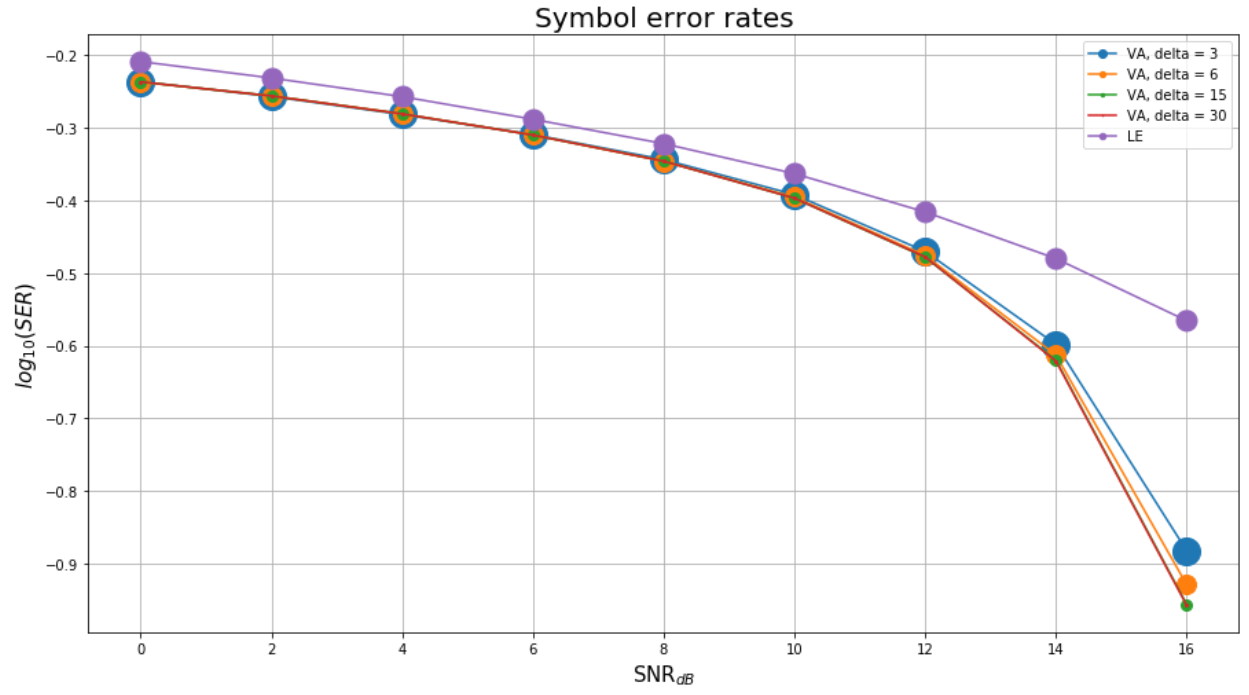

#### Observation:
- The SER plot for LE is entirely above the one for VA (for all $\delta$'s)


## (c) Decision Feedback Equalizer

For DFE with N$_1$ FF taps and N$_2$ FB taps,
$$
\mathbf{W}_{\text{opt}} = 
\begin{bmatrix}
\mathbf{R}_{_{N_1\times N1}} & -\mathbf{S}_{_{N_1\times N_2}} \\
-\mathbf{S}_{_{N_1\times N_2}}^T & \mathbb{1}_{_{N_2\times N_2}}
\end{bmatrix}^{-1}
\begin{bmatrix}
\mathbf{p}_{_{N_1\times 1}}\\
\mathbb{0}_{_{N_2\times 1}}
\end{bmatrix}
$$
where
$$
\mathbf{S} = \mathbf{F}_{N_1\times (N_{1}+2)}\mathbf{Q}_{(N_{1}+2)\times N_2 }
$$
where
$$
\mathbf{F} = 
\begin{bmatrix}
f_0 & f_1 & f_2 & 0 & \cdots & 0 & 0\\
0 & f_0 & f_1 & f_2 & 0 & \cdots & 0\\
\vdots&&&\ddots&&\vdots\\
0&0&\cdots&0&f_0 & f_1 & f_2\\
\end{bmatrix}
$$
and
$$
\mathbf{Q} = 
\begin{bmatrix}
q_{0,0}=0&&\cdots&&0\\
\vdots&&&&\vdots\\
0&&\cdots&&0\\
q_{_{(\Delta+1),0}}=1\\
0& 1 & 0 & \cdots & 0\\
\vdots&&\ddots\\
0&\cdots&0&q_{_{\Delta+1+j,j}} = 1\cdots&0\\
\end{bmatrix}
$$

### Z-tranform of system
For DFE, since the output depends upon past outputs it has an IIR and hence Z-transform is used.
$$
H(z) = \frac{W_{FF}(z)}{1+z^{-1}W_{FB}(z)}
$$

### Results:

#### (c1) N$_1$ = 6, N$_2$ = 4, $\Delta$ = 0, SNR = 10dB
$$
W_{\text{opt}} = 
\begin{bmatrix}
1.34&  6.72\times10^{-16}&  1.62\times10^{-17}&
 -3.98\times10^{-17}& -2.73\times10^{-17}& -0.952 & \big| & 0.571&
  8.84\times10^{-16}& -3.93\times10^{-16}
\end{bmatrix}^T \\
J_{\text{min}} = 0.2381
$$

#### (c2) N$_1$ = 6, N$_2$ = 4, $\Delta$ = 3, SNR = 10dB
$$
W_{\text{opt}} = 
\begin{bmatrix}
6.07\times10^{-2} & -2.99\times10^{-2} & -0.366 &  1.02 &
  2.14\times10^{-16} &  1.75\times10^{-16} & \big| & -0.873 &  0.431 &
 -8.24\times10^{-17} & 7.69\times10^{-17}
\end{bmatrix}^T \\
J_{\text{min}} = 0.1796
$$

#### (c4) Minimise J$_{min}$ w.r.t N$_1$, N$_2$ and $\Delta$ s.t. N$_1$+N$_2$ = 10 

J$_{\text{min}}(N_1, N_2, \Delta)$ was calculated for $N_1 = 1,...,9$ (correspondingly $N_2 = 9,...,1$) and $\Delta = 0,...,N_1$ for each case.

$J_{\text{min}} = 0.17372072544483885$, for $N_1 = 8$, $N_2 = 2$ and $\Delta = 7$

#### (c5)
**SER:**

| SNR(dB) 	| 0      	| 2       	| 4      	| 6       	| 8       	| 10      	| 12      	| 14      	| 16      	|
|---------	|--------	|---------	|--------	|---------	|---------	|---------	|---------	|---------	|---------	|
| **SER:**    	| 0.61776 | 0.58648 | 0.55308 | 0.51477 | 0.47639 | 0.43405 | 0.38536 | 0.33351 | 0.27507 	|

**Figure 3**
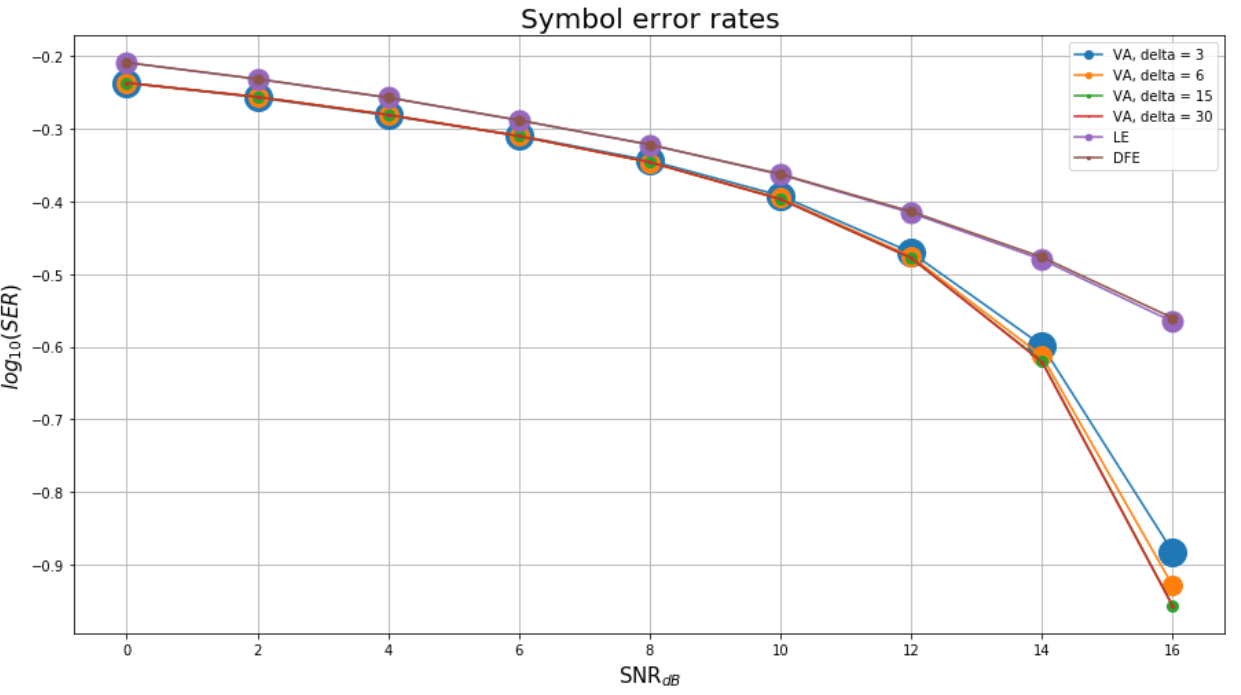

#### Observation:
- SER for LE and DFE are almost identical

## Bonus Question

Equivalent channels were found for LE and DFE.

Equivalent channel for LE, $ h_{LE}(k) = f(k)*W_{opt,LE}(k)$

For DFE, Z-transform of effective channel, $ H_{DFE}(z) = F(z).W_{FF}(z)\big/\left(1+z^{-1}W_{FB}(z)\right)$

The transmitted symbols were passed through these two effective channels (without noise). The deviation of the output $\hat{I}(k-\Delta)$ from the shifted transmitted symbols $I(k-\Delta)$ is only due to the residual inter symbol interference. Hence, the sum variance of the residual inter symbol interference,
$$
V_{ISI} = \frac{||\hat{I}(k-\Delta) - I(k-\Delta)||^2}{\text{no. of symbols}}
$$

### Results:

#### For LE:
$$
V_{ISI, LE} = 0.21812973344913097
$$

#### For DFE:
$$
V_{ISI, DFE} = 0.20967372805330065
$$

# Annexure-1

## Defining the preliminary variables:

In [2]:
#The scaling 'd' for the symbols (-3d,-d,...) s.t. avg power = 1
d = 1/(5**0.5) 

#Channel coefficients
f_k = 0.5**0.5*np.array([0.8, -1, 0.6])

#Symbols (scaled by 1/d)
symbols = np.array([-3, -1, 1, 3])

#Arrays containing SNR(dB) and sigma_v values
SNR_dB_arr = np.linspace(0, 16, 9)
sigma_v_arr = 10**(-SNR_dB_arr/20)

In [3]:
#No. of symbols transmitted
num_sym = int(1e5) + 2

#Generating the transmitted symbols
sym_trans = d*(2*np.random.randint(4, size=num_sym-2) - 3)
#The last 2 symbols are known (chosen to be (-d,-d) so that they take less energy)
sym_trans = np.append(sym_trans, np.array([-d, -d]))

#Array containing noise for num_sym instances for different sigma_v's
channel_noise_arr = np.zeros((len(sigma_v_arr), num_sym))
for i,sigma_v in enumerate(sigma_v_arr):
    channel_noise_arr[i] = np.random.normal(0, sigma_v, num_sym)

#Received symbols = convolve(transmitted symbols, channel) + noise 
sym_rec_arr = np.convolve(sym_trans,f_k)[:-2] + channel_noise_arr
#last 2 symbols of convolution were not considered because they represent (f[1]*I[n]+f[2]*I[n-1], f[2]*I[n]) 

## (a) Viterbi Algorithm

In [4]:
#While using the viterbi algorithm, the symbols have been 'tracked' by denoting (-3d, d, d, 3d) = (0, 1, 2, 3)
# And the 16 symbol combinations (I[k], I[k-1]) are written in base10 (where I[i] \in {0,1,2,3})
# These 16 combination denote rows, and row no. = 4*I[k] + I[k-1]


#Function to calculate rcap = f[0]*g[0] + f[1]*g[1] f[2]*g[2]
#where g is a unique generator sequence, g = [kth, k-1th, k-2th] symbols (scaled by 1/d)
def calc_rcap_k(g):
    return d*np.sum(f_k*g)

#Defining the g's and the corresponding rcap:

G = np.zeros((64,3)) #Will store the 64 unique g's. Row no. = 16*g[0] + 4*g[1] + g[2] (g[i] \in {0, 1, 2, 3})
Rcap_k0 = np.zeros(4)  #Will store possible rcap's for the first symbol I[0] (I[-1] and I[-2] are taken to be zero)
#Hence only 4 possible rcap's

Rcap_k1 = np.zeros(16) #Will store possible rcap's for the 2nd symbol I[1]
#16 possible rcap's corr. to 16 combinations (I[1],I[0])

Rcap    = np.zeros((16,4)) #Will store possible rcap's for rest of the symbols 
#64 possible combinations (I[k], I[k-1], I[k-2])
#(k,k-1) corr. to rows and (k-2) to columns
# row no. is as defined in the beginning
# column no. = I[k-2]

#Defining the quantities accordingly:
for i, sym_i in enumerate(symbols):
    
    Rcap_k0[i] = d*symbols[i]*f_k[0] #rcap[0] = I[0]*f[0]
    
    for j, sym_j in enumerate(symbols):
        
        Rcap_k1[4*i+j] = d*symbols[i]*f_k[0] + d*symbols[j]*f_k[1] #rcap[1] = I[1]*f[0] + I[0]*f[1]
        
        for k, sym_k in enumerate(symbols):
            idx = 16*i + 4*j + k
            G[idx] = np.array([sym_i, sym_j, sym_k])
            Rcap[4*i+j, k] = calc_rcap_k(G[idx])


#Function to move one step forward in trellis, with one incoming symbol:

#(some variables used in the function have been initialised in the next cell)

def one_step_frwrd_in_trellis(r_k, k):
    #Input: 'k'th instance and corr. symbol r_k (a scalar)
    
    global CM, Trellis #Calling the global variables
    
    #When k=0, CM is initialised 
    if k == 0:
        for i in range(4):
            CM[i::4] = (r_k - Rcap_k0[i])**2
    
    #When k=1, we have the first column of the Trellis corr. to (k,k-1)=(1,0)
    #CM is updated, no TM yet
    elif k == 1:
        CM = CM + (r_k - Rcap_k1)**2 
    
    #For rest of the symbols:
    else:
        
        #Calculating the transition metric, shape(TM) = shape(Rcap) = (16,4)
        # row no. and col no. corr. to (4*I[k]+I[k-1], I[k-2])
        TM = (r_k - Rcap)**2
        
        # shape(CM) = (16,), CM[i] corr. to i = 4*I[k-1] + I[k-2]
        CM_4_4  = CM.reshape(4,4)
        CM_16_4 = np.vstack((CM_4_4, CM_4_4, CM_4_4, CM_4_4))
        #For i = 4*I[k]+I[k-1], j = I[k-2]; CM_16_4[i,j] = CM[ 4*(imod4) + j ] = CM[ 4*I[k-1] + I[k-2] ] 
        
        #Calculating the total metric
        TotalM = TM + CM_16_4
        
        #Finding the minimum along rows
        CM = np.amin(TotalM, axis = 1) #updating CM
        srvvr_k_1_k_2_for_k_k_1 = srvvr_4k_1 + np.argmin(TotalM, axis = 1)
        #survivor from the prev col. for (4*I[k]+I[k-1])th element of the col. (k,k-1) = 4*I[k-1] + I[k-2] for which 
        #total metric is minimum
        
        #Update Trellis, take only those rows which are in srvvr_k_1_k_2_for_k_k_1 and add a row 4*I[k]+I[k-1]
        Trellis = np.hstack( (Trellis[srvvr_k_1_k_2_for_k_k_1], k_k_1_b10) )

    return None


# Function to make a decision for k-delta'th symbol:

def make_decision(delta):
    global Trellis, sym_dec_VA
    #sym_dec_VA is the global list that stores the decoded symbols
    
    #If k-delta'th element is present in trellis, i.e. no. of columns is > delta:
    if np.shape(Trellis)[1] >= delta+1 :
        
        #Choose the k-delta'th element of the sequence with the least CM at (k,k-1) col. and convert from {0,1,2,3} 
        #to {-3d, -d, d, 3d}
        I_k_delta = d*((Trellis[np.argmin(CM), -1-delta]%4)*2 - 3)
        sym_dec_VA.append(I_k_delta)
        
        #Delete this col. from the Trellis
        Trellis = np.delete(Trellis, -1-delta, axis=1)
    else:
        None

    return None    

### (a1), (a2), (a3), (a4)

In [5]:
sym_dec_VA_d_SNR = [] #list to store decoded strings for different delta's and SNR's
delta_lst = [3, 6, 15, 30] #list of delta's

#Loop running over delta values
for delta in delta_lst:
    
    sym_dec_VA_SNR = [] #list to store decoded strings fr diff. SNR's for a given delta
    
    #Loop running over SNR values
    for i_sv in range(len(sigma_v_arr)):

        sym_dec_VA = [] #list to store the decoded string for a given delta and SNR

        #Initialising a few variables
        CM = np.zeros(16)          #Cummulative metric
        TM = np.zeros((16,4))      #Transition metric
        srvvr_4k_1 = np.zeros(16, dtype=int)
        for i in range(4):
            srvvr_4k_1[i::4]  = 4*i
        k_k_1_b10 = np.arange(16).reshape(16,1)
        Trellis = np.arange(16).reshape(16,1)
        
        #Loop running over the received symbols
        for k, r_k in enumerate(sym_rec_arr[i_sv]):

            one_step_frwrd_in_trellis(r_k, k)
            make_decision(delta)

        sym_dec_VA = np.array(sym_dec_VA)
        
        #Selecting the sequence remaining in the Trellis with [-d,-d] at the end (i.e. 5th row)
        # and converting symbols from {0,1,2,3} to {-3d, -d, d, 3d}
        I_n_d_n = d*(2*np.append(Trellis[5]%4, Trellis[5,-1]//4)-3)
        
        sym_dec_VA = np.append(sym_dec_VA, I_n_d_n) #Final decoded string for this SNR

        sym_dec_VA_SNR.append(sym_dec_VA) #Adding it in sym_dec_VA_SNR  
        
    sym_dec_VA_d_SNR.append(sym_dec_VA_SNR) #Adding th list with decoded strings for all SNR's to sym_dec_VA_d_SNR

sym_dec_VA_d_SNR = np.array(sym_dec_VA_d_SNR)

In [6]:
#Calculating SER for VA
SER_arr_VA = 1 - np.count_nonzero( sym_dec_VA_d_SNR[:,:,:-2]==sym_trans[:-2], axis=2)/(num_sym-2)
print('SER for VA = ',SER_arr_VA)
print('(Rows correspond to delta = [3, 6, 15, 30])')
print('(Columns correspond to SNR values 0 to 16 in steps of 2)')

SER for VA =  [[0.57802 0.55214 0.52078 0.48732 0.45371 0.40521 0.33685 0.24814 0.13388]
 [0.57823 0.55245 0.51915 0.48748 0.45107 0.40312 0.33242 0.23999 0.12117]
 [0.57874 0.55245 0.51861 0.4873  0.45079 0.40147 0.33033 0.23828 0.11631]
 [0.57868 0.55251 0.51838 0.4872  0.45062 0.40128 0.33005 0.23866 0.11642]]
(Rows correspond to delta = [3, 6, 15, 30])
(Columns correspond to SNR values 0 to 16 in steps of 2)


### Figure 1

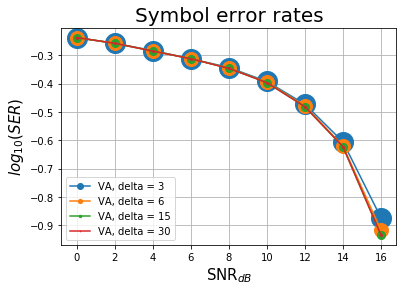

In [24]:
plt.figure()
for i, delta in enumerate(delta_lst):
    plt.plot(SNR_dB_arr, np.log10(SER_arr_VA[i]),'-o', label='VA, delta = '+str(delta),markersize=20-6*i)
plt.legend(markerscale=0.3)
plt.title('Symbol error rates',size=20)
plt.xlabel('SNR$_{dB}$',size=15)
plt.ylabel('$log_{10}(SER)$',size=15)
plt.grid()
plt.show()

## (b) Linear Equaliser

In [8]:
def LE_crosscorr_vec(N, Delta):
    # Constructing the cross correlation vector
    p = np.zeros(N)
    if 1 < Delta < N:
        p[Delta-2:Delta+1] = f_k[2::-1]
    elif Delta == 0:
        p[0] = f_k[0]
    elif Delta == 1:
        p[:2] = f_k[1::-1]
    else:
        #Have only defined for Delta in 0 to N-1
        print('Delta = ',Delta,' for N = ',N,' not supported')
        return None
    return p
    

def LE_calc_W_opt(N, Delta, sigma_v):
    
    if N<3:
        print('N = ',N,' not supported')
        return None
    else:
        R_col = np.zeros(N)

        R_col[0] = np.linalg.norm(f_k)**2 + sigma_v**2
        R_col[1] = f_k[0]*f_k[1] + f_k[1]*f_k[2]
        R_col[2] = f_k[0]*f_k[2]
    
    p = LE_crosscorr_vec(N, Delta)
    
    #solve_toeplitz constructs a toeplitz matrix R using the first column R_col
    # and solves R @ W_opt = p
    W_opt = sciLA.solve_toeplitz(R_col, p)
    
    return W_opt

def LE_calc_Jmin(N, Delta, W_opt):
    p = LE_crosscorr_vec(N, Delta)
    return 1 - W_opt @ p

### (b1) N = 3, $\Delta$ = 0, SNR = 10dB

In [9]:
N_b1, Delta_b1, SNR_dB_b1 = 3, 0, 10
sigma_v_b1 = 10**(-10/20)

W_opt_b1 = LE_calc_W_opt(N_b1, Delta_b1, sigma_v_b1)
Jmin_b1 = LE_calc_Jmin(N_b1, Delta_b1, W_opt_b1)

print('N = ',N_b1,', Delta = ',Delta_b1,', SNR = ',SNR_dB_b1,'dB')
print('W_opt = ',W_opt_b1)
print('J_min = ',Jmin_b1)

N =  3 , Delta =  0 , SNR =  10 dB
W_opt =  [0.95869858 0.80157854 0.30092483]
J_min =  0.45767818472836796


### (b2) N = 10, $\Delta$ = 0, SNR = 10dB

In [10]:
N_b2, Delta_b2, SNR_dB_b2 = 10, 0, 10
sigma_v_b2 = 10**(-10/20)

W_opt_b2 = LE_calc_W_opt(N_b2, Delta_b2, sigma_v_b2)
Jmin_b2 = LE_calc_Jmin(N_b2, Delta_b2, W_opt_b2)

print('N = ',N_b2,', Delta = ',Delta_b2,', SNR = ',SNR_dB_b2,'dB')
print('W_opt = ',W_opt_b2)
print('J_min = ',Jmin_b2)

N =  10 , Delta =  0 , SNR =  10 dB
W_opt =  [ 0.98162681  0.84173676  0.31296526 -0.08206659 -0.20034628 -0.13712618
 -0.03402374  0.02698237  0.03503563  0.01640834]
J_min =  0.44470802028801526


### (b3) N = 10, $\Delta$ = 5, SNR = 10dB

In [11]:
N_b3, Delta_b3, SNR_dB_b3 = 10, 5, 10
sigma_v_b3 = 10**(-10/20)

W_opt_b3 = LE_calc_W_opt(N_b3, Delta_b3, sigma_v_b3)
Jmin_b3 = LE_calc_Jmin(N_b3, Delta_b3, W_opt_b3)

print('N = ',N_b3,', Delta = ',Delta_b3,', SNR = ',SNR_dB_b3,'dB')
print('W_opt = ',W_opt_b3)
print('J_min = ',Jmin_b3)

N =  10 , Delta =  5 , SNR =  10 dB
W_opt =  [ 0.05175672  0.18258482  0.29532074  0.17546218 -0.36100637  0.58939739
  0.64385394  0.30512781  0.01904098 -0.05445636]
J_min =  0.3368741374003441


### (b4) Best choice for N and $\Delta$ for SNR = 10dB by trial and error

In [12]:
SNR_dB_b4 = 10
sigma_v_b4 = 10**(-10/20)

N_b4_vec = np.arange(3,201)
Jmin_b4 = np.ones((201-3, 200))

for N_b4 in N_b4_vec:
    for d_b4 in range(N_b4):
        W_opt_b4 = LE_calc_W_opt(N_b4, d_b4, sigma_v_b4)
        Jmin_b4[N_b4 - 3, d_b4] = LE_calc_Jmin(N_b4, d_b4, W_opt_b4)

#plt.figure()
#plt.plot(Delta, Jmin)
#plt.show()

print('Jmin = ', np.amin(Jmin_b4))
print('For N = ', N_b4_vec[np.where(Jmin_b4 == np.amin(Jmin_b4))[0]])
print('for Delta = ', np.where(Jmin_b4 == np.amin(Jmin_b4))[1])
#print('W_opt = ',W_opt)

Jmin =  0.33145582671881646
For N =  [ 81  82  83 ... 200 200 200]
for Delta =  [ 40  41  41 ... 155 157 159]


### (b5) SER for varying SNR

In [13]:
sym_eqlzd_LE_arr = np.zeros(np.shape(sym_rec_arr[:,:-2]))
sym_dec_LE_arr = np.zeros(np.shape(sym_rec_arr[:,:-2]))

#Taking the first N and Delta for which Jmin was minimum in the prev. part
N_b5     = (N_b4_vec[np.where(Jmin_b4 == np.amin(Jmin_b4))[0]])[0]
Delta_b5 = (np.where(Jmin_b4 == np.amin(Jmin_b4))[1])[1]

for i_s_v_b5, sigma_v_b5 in enumerate(sigma_v_arr):
    W_opt_b5 = LE_calc_W_opt(N_b5, Delta_b5, sigma_v_b5)
    
    sym_eqlzd_LE_arr[i_s_v_b5] = np.convolve(sym_rec_arr[i_s_v_b5,:-2], W_opt_b5)[Delta_b5 : Delta_b5 + num_sym-2]
    #Decoded are considered from the Delta'th symbol because this was the defn. of Delta


#MSE = np.linalg.norm(sym_eqlzd_LE_arr - sym_trans[:-2],axis=1)**2/(num_sym-2)    

#Making symbol decisions
sym_dec_LE_arr[ (sym_eqlzd_LE_arr <=-2*d) ] = -3*d
sym_dec_LE_arr[ (sym_eqlzd_LE_arr > -2*d) & (sym_eqlzd_LE_arr <=   0) ] = -d
sym_dec_LE_arr[ (sym_eqlzd_LE_arr >    0) & (sym_eqlzd_LE_arr <= 2*d) ] =  d
sym_dec_LE_arr[ (sym_eqlzd_LE_arr >  2*d) ] =  3*d

#Calculating SER
SER_arr_LE = 1 - np.count_nonzero( sym_dec_LE_arr==sym_trans[:-2], axis=1)/(num_sym-2)
print('SER_arr_LE = ',SER_arr_LE)

SER_arr_LE =  [0.61902 0.58712 0.5519  0.51353 0.47584 0.43478 0.3844  0.33147 0.27161]


### Figure 2

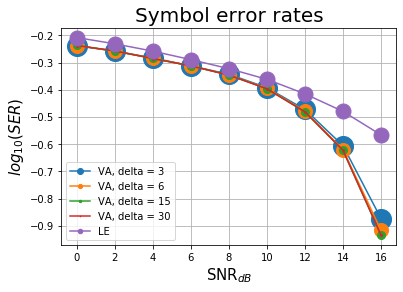

In [23]:
plt.figure()
for i, delta in enumerate(delta_lst):
    plt.plot(SNR_dB_arr, np.log10(SER_arr_VA[i]),'-o', label='VA, delta = '+str(delta),markersize=20-6*i)
plt.plot(SNR_dB_arr.T, np.log10(SER_arr_LE),'-o', label='LE',markersize=15)
plt.legend(markerscale=0.3)
plt.title('Symbol error rates',size=20)
plt.xlabel('SNR$_{dB}$',size=15)
plt.ylabel('$log_{10}(SER)$',size=15)
plt.grid()
plt.show()

## (c) Decision Feedback Equaliser

In [15]:
def DFE_autocorr_mat(N1, N2, Delta, sigma_v):
    
    R_col = np.zeros(N1)
    if N1==1:
        R_col[0] = np.linalg.norm(f_k)**2 + sigma_v**2
    elif N1 == 2:
        R_col[0] = np.linalg.norm(f_k)**2 + sigma_v**2
        R_col[1] = f_k[0]*f_k[1] + f_k[1]*f_k[2]
    elif N1>2:
        R_col[0] = np.linalg.norm(f_k)**2 + sigma_v**2
        R_col[1] = f_k[0]*f_k[1] + f_k[1]*f_k[2]
        R_col[2] = f_k[0]*f_k[2]
        
    R = sciLA.toeplitz(R_col)
        
    F = np.zeros((N1, N1 + 2))
    for i in range(N1):
        F[i, i:i+3] = f_k
    
    Q = np.zeros((N1+2, N2))
    for i in range(N1+2):
        for j in range(N2):
            if i-j == Delta+1:
                Q[i,j] = 1
                
    S = F @ Q
    
    AC = np.vstack( ( np.hstack((R, -S)) , np.hstack( (-S.T, np.identity(N2))) ) )
    
    return AC

def DFE_crosscorr_vec(N1, N2, Delta):
    CC = np.zeros(N1+N2)
    if 1 < Delta < N1:
        CC[Delta-2:Delta+1] = f_k[2::-1]
    elif Delta == 0:
        CC[0] = f_k[0]
    elif Delta == 1:
        CC[:2] = f_k[1::-1]
    else:
        print('Delta = ',Delta,' for N1 = ',N1,' not supported')
        return None
    return CC

def DFE_calc_W_opt(N1, N2, Delta, sigma_v):
    
    AC = DFE_autocorr_mat(N1, N2, Delta, sigma_v)
    CC = DFE_crosscorr_vec(N1, N2, Delta)
    
    return np.linalg.inv(AC) @ CC

def DFE_calc_Jmin(N1, N2, Delta, W_opt):
    p = DFE_crosscorr_vec(N1, N2, Delta)[:N1]
    return 1 - W_opt[:N1] @ p

### (c1) N$_1$ = 6, N$_2$ = 4, $\Delta$ = 0, SNR = 10dB

In [16]:
N1_c1, N2_c1, Delta_c1, SNR_dB_c1 = 6, 4, 0, 10
sigma_v_c1 = 10**(-10/20)

W_opt_c1 = DFE_calc_W_opt(N1_c1, N2_c1, Delta_c1, sigma_v_c1)
Jmin_c1  = DFE_calc_Jmin(N1_c1, N2_c1, Delta_c1, W_opt_c1)

print('N1 = ',N1_c1,', N2 = ',N2_c1,', Delta = ',Delta_c1,', SNR = ',SNR_dB_c1,'dB')
print('W_opt = ',W_opt_c1)
print('J_min = ',Jmin_c1)

N1 =  6 , N2 =  4 , Delta =  0 , SNR =  10 dB
W_opt =  [ 1.34687006e+00  6.71650663e-16 -7.88893795e-16  1.61632389e-17
 -3.97857859e-17 -2.73480083e-17 -9.52380952e-01  5.71428571e-01
  8.83922220e-16 -3.92951646e-16]
J_min =  0.2380952380952377


### (c2) N$_1$ = 6, N$_2$ = 4, $\Delta$ = 3, SNR = 10dB

In [17]:
N1_c2, N2_c2, Delta_c2, SNR_dB_c2 = 6, 4, 3, 10
sigma_v_c2 = 10**(-10/20)

W_opt_c2 = DFE_calc_W_opt(N1_c2, N2_c2, Delta_c2, sigma_v_c2)
Jmin_c2  = DFE_calc_Jmin(N1_c2, N2_c2, Delta_c2, W_opt_c2)

print('N1 = ',N1_c2,', N2 = ',N2_c2,', Delta = ',Delta_c2,', SNR = ',SNR_dB_c2,'dB')
print('W_opt = ',W_opt_c2)
print('J_min = ',Jmin_c2)

N1 =  6 , N2 =  4 , Delta =  3 , SNR =  10 dB
W_opt =  [ 6.07156583e-02 -2.99095927e-02 -3.65516413e-01  1.01585039e+00
  2.13679245e-16  1.74654465e-16 -8.73390177e-01  4.30988818e-01
 -8.24298541e-17  7.69345305e-17]
J_min =  0.1795786741536255


### (c3) Minimise J$_{min}$ w.r.t N$_1$, N$_2$ and $\Delta$ s.t. N$_1$+N$_2$ = 10 

In [18]:
Jmin_mat_c3 = np.ones((9,9))
sigma_v_c3 = 10**(-10/20)

for N1_c3 in range(1,10):
    N2_c3 = 10 - N1_c3
    
    for d_c3 in range(N1_c3):
        W_opt_c3 = DFE_calc_W_opt(N1_c3, N2_c3, d_c3, sigma_v_c3)
        Jmin_mat_c3[N1_c3-1,d_c3]  = DFE_calc_Jmin(N1_c3, N2_c3, d_c3, W_opt_c3)
        
Jmin_c3 = np.amin(Jmin_mat_c3)
id_Jmin_c3 = np.where(Jmin_mat_c3 == Jmin_c3)

print('Jmin = ', Jmin_c3)
print('For\tN1 = ', (id_Jmin_c3[0]+1)[0])
print(',\tN2 = ', 10-(id_Jmin_c3[0]+1)[0])
print('&\tDelta = ', (id_Jmin_c3[1])[0])

Jmin =  0.17372072544483885
For	N1 =  8
,	N2 =  2
&	Delta =  7


### (c4)

In [19]:
sym_eqlzd_DFE_arr = np.zeros(np.shape(sym_rec_arr[:,:-2]))
sym_dec_DFE_arr = np.zeros(np.shape(sym_rec_arr[:,:-2]))

N1_c4, N2_c4, Delta_c4 = 8, 2, 7

for i_s_v, sigma_v_c4 in enumerate(sigma_v_arr):
    W_opt_c4 = DFE_calc_W_opt(N1_c4, N2_c4, Delta_c4, sigma_v_c4)
    
    # y = scipy.signal.lfilter(b,a,r)
    # where
    # a[0]y[n] = b[0]r[n] + b[1]r[n-1] + ... + b[M]r[n-M]
    #                  - a[1]y[n-1] - a[2]y[n-2] - ... - a[N]y[n-N]
    sym_eqlzd_DFE_arr[i_s_v] = sci_sig.lfilter(
        W_opt_c4[:N1_c4], np.append(1,W_opt_c4[N1_c4:]), 
        np.append(sym_rec_arr[i_s_v,:-2], np.zeros(Delta_c4)) )[Delta_c4:]
    # Delta zeros were added at the end and the output symbols were only considered from the Delta'th element
    # because for for our case, we have y[n-Delta] instead of y[n], and the function doesn't allow a[0] to be zero

#MSE = np.linalg.norm(sym_eqlzd_DFE_arr - sym_trans[:-2],axis=1)**2/(num_sym-2)    

#Making symbol decisions
sym_dec_DFE_arr[ (sym_eqlzd_DFE_arr <=-2*d) ] = -3*d
sym_dec_DFE_arr[ (sym_eqlzd_DFE_arr > -2*d) & (sym_eqlzd_DFE_arr <=   0) ] = -d
sym_dec_DFE_arr[ (sym_eqlzd_DFE_arr >    0) & (sym_eqlzd_DFE_arr <= 2*d) ] =  d
sym_dec_DFE_arr[ (sym_eqlzd_DFE_arr >  2*d) ] =  3*d

SER_arr_DFE = 1 - np.count_nonzero( sym_dec_DFE_arr==sym_trans[:-2], axis=1)/(num_sym-2)
print('SER_arr_DFE = ',SER_arr_DFE)
#print('log(SER_arr_DFE) = ',np.log10(SER_arr_DFE))
#print('MSE = ', MSE)

SER_arr_DFE =  [0.61901 0.587   0.55192 0.51347 0.47619 0.43534 0.38419 0.33363 0.2733 ]


### Figure 3

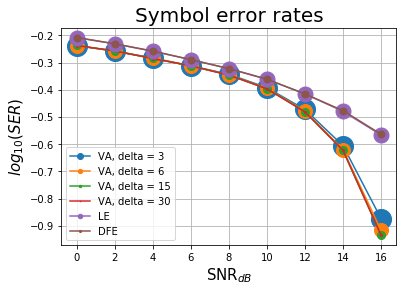

In [25]:
plt.figure()
for i, delta in enumerate(delta_lst):
    plt.plot(SNR_dB_arr, np.log10(SER_arr_VA[i]),'-o', label='VA, delta = '+str(delta),markersize=20-6*i)
plt.plot(SNR_dB_arr.T, np.log10(SER_arr_LE),'-o', label='LE',markersize=15)
plt.plot(SNR_dB_arr, np.log10(SER_arr_DFE),'-o',label='DFE',markersize=7)
plt.legend(markerscale=0.3)
plt.title('Symbol error rates',size=20)
plt.xlabel('SNR$_{dB}$',size=15)
plt.ylabel('$log_{10}(SER)$',size=15)
plt.grid()
plt.show()

## Bonus Question

## LE
#### N = 10, $\Delta$ = 4, SNR = 10dB

In [21]:
N_bq, Delta_LE_bq = 10, 4
sigma_v_bq = 10**(-10/20)

W_opt_bq_LE = LE_calc_W_opt(N_bq, Delta_LE_bq, sigma_v_bq)

eff_ch = np.convolve(f_k, W_opt_bq_LE)

sym_eqlzd_LE_bq = np.convolve(sym_trans, eff_ch)[Delta_LE_bq : Delta_LE_bq + num_sym-2]

var_res_ISI_LE = np.linalg.norm(sym_trans[:-2] - sym_eqlzd_LE_bq)**2/(num_sym-2)

print('Variance of residual ISI for LE = ', var_res_ISI_LE)

Variance of residual ISI for LE =  0.2183628366392651


## DFE
#### N$_1$ = 8, N$_2$ = 2, $\Delta$ = 7, SNR = 10dB

In [22]:
N1_bq, N2_bq, Delta_DFE_bq = 8, 2, 7
sigma_v_bq = 10**(-10/20)

W_opt_bq_DFE = DFE_calc_W_opt(N1_bq, N2_bq, Delta_DFE_bq, sigma_v_bq)

eff_ch_Z_num = np.convolve(f_k, W_opt_bq_DFE[:N1_bq])
eff_ch_Z_den = np.append(1,W_opt_bq_DFE[N1_bq:])

sym_eqlzd_DFE_bq = sci_sig.lfilter(
    eff_ch_Z_num, eff_ch_Z_den, 
    np.append(sym_trans[:-2], np.zeros(Delta_DFE_bq)) )[Delta_DFE_bq:]

var_res_ISI_DFE = np.linalg.norm(sym_trans[:-2] - sym_eqlzd_DFE_bq)**2/(num_sym-2)

print('Variance of residual ISI for DFE = ', var_res_ISI_DFE)

Variance of residual ISI for DFE =  0.20985248899453887
